# Análisis Exploratorio de Datos de Seguros Médicos

Explorar y analizar diversos aspectos relacionados con los datos de seguros médicos, incluyendo la distribución de edades, sexo, correlaciones entre variables, efectos de fumar, costos del seguro según regiones geográficas, entre otros, con el fin de obtener insights y comprender mejor los factores que influyen en los costos y patrones de aseguramiento médico.

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# Obtiene el directorio actual
directorio_actual = os.getcwd()

# Nombre del archivo CSV que se desea abrir
nombre_archivo = "Us_insurance_health.csv"

# Se Construye la ruta completa del archivo utilizando os.path.join
ruta_completa = os.path.join(directorio_actual, nombre_archivo)

# Verifico si el archivo existe antes de intentar abrirlo
if os.path.exists(ruta_completa):
    # Abre el archivo CSV utilizando pandas
    df = pd.read_csv(ruta_completa)

else:
    print(f"El archivo {nombre_archivo} no existe en el directorio actual.")


In [10]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
df.shape

(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [13]:
df.duplicated().any()

True

In [17]:
df.drop_duplicates(inplace = True)

In [18]:
df.duplicated().any()

False

In [19]:
df.shape

(1337, 7)

¿Cuál es la distribución de edades de las personas en el conjunto de datos?

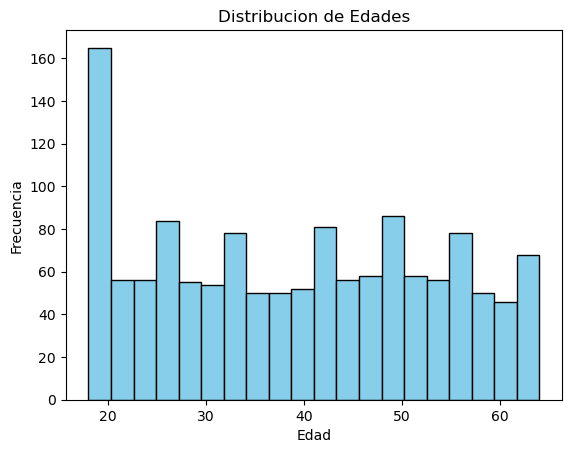

In [34]:
# Histograma de distribución de edades

plt.hist(df['age'],bins = 20,color = 'skyblue',edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribucion de Edades')
plt.show()

¿Cómo se distribuyen los sexos de los individuos en el conjunto de datos?

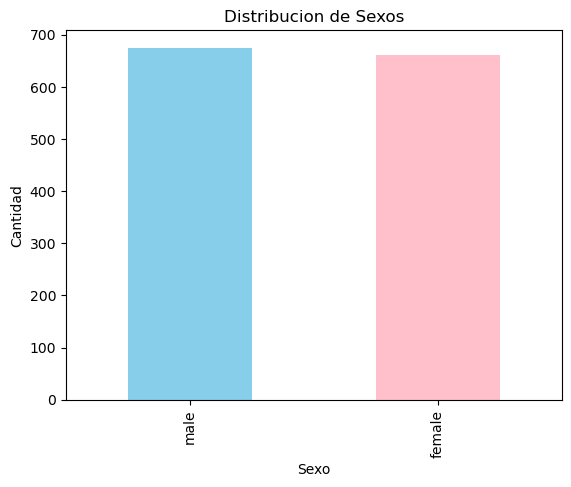

In [35]:
#Distribución de sexos de los individuos en el conjunto de datos

df['sex'].value_counts().plot(kind = 'bar',color=['skyblue','pink'])
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.title('Distribucion de Sexos')
plt.show()

In [32]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [40]:
correlacion = df['age'].corr(df['bmi'])
print("Correlacion entre edad y Masa Corporal: ",correlacion)

Correlacion entre edad y Masa Corporal:  0.10934361041896887


In [41]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


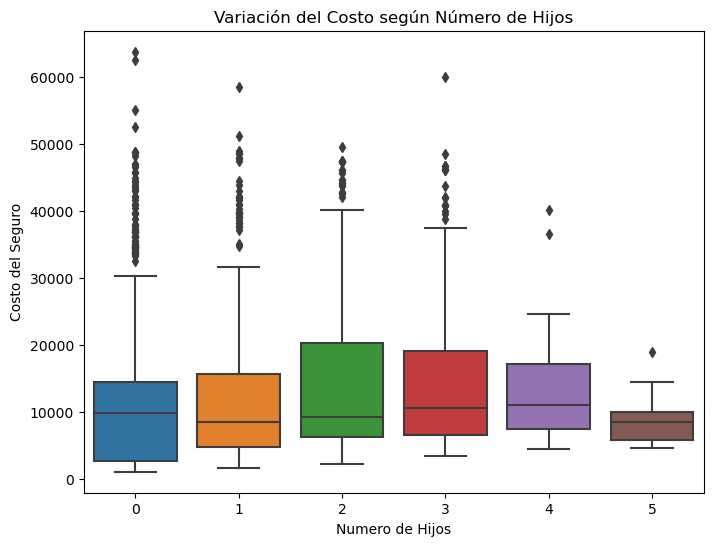

In [42]:
#Variación del costo del seguro médico con respecto al número de hijos

plt.figure(figsize = (8,6))
sns.boxplot(x = 'children',y='charges',data = df)
plt.title("Variación del Costo según Número de Hijos")
plt.xlabel('Numero de Hijos')
plt.ylabel('Costo del Seguro')
plt.show()

In [44]:
#Proporción de fumadores en comparación con no fumadores
conteo_fumadores = df['smoker'].value_counts()
print("Proporcion de fumadores y no fumadores: ")
print(conteo_fumadores)

Proporcion de fumadores y no fumadores: 
no     1063
yes     274
Name: smoker, dtype: int64


In [47]:
#Diferencias significativas en los costos del seguro entre fumadores y no fumadores
cargos_fumadores = df[df['smoker']=='yes']['charges']
cargos_no_fumadores = df[df['smoker']=='no']['charges']
t_stat,p_value = stats.ttest_ind(cargos_fumadores,cargos_no_fumadores)
print('El valor p obtenido de la prueba t es:', p_value)


El valor p obtenido de la prueba t es: 1.4067220949376498e-282


In [57]:
#Región geográfica con el mayor número de individuos

region_geografica = df['region'].value_counts().idxmax()
print("Región con el mayor número de individuos:",region_geografica)

Región con el mayor número de individuos: southeast


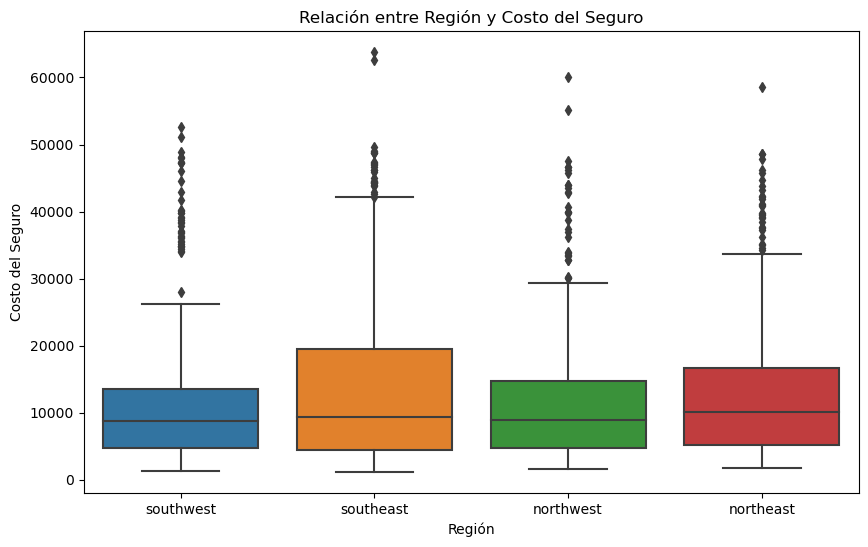

In [58]:
#Relación entre la región geográfica y el costo del seguro médico

plt.figure(figsize = (10,6))
sns.boxplot(x='region',y='charges',data = df)
plt.title("Relación entre Región y Costo del Seguro")
plt.xlabel('Región')
plt.ylabel('Costo del Seguro')
plt.show()

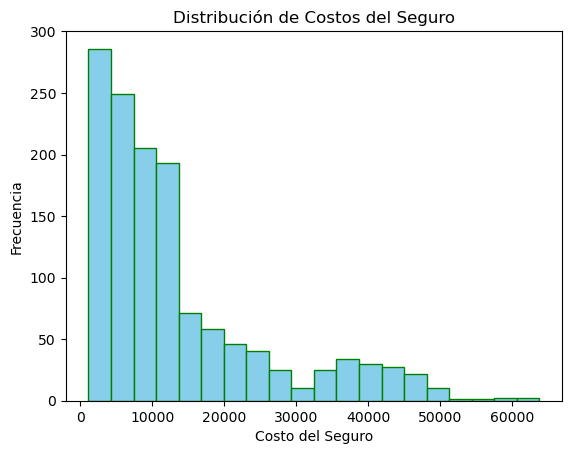

In [65]:
#Distribución de los costos del seguro médico
plt.hist(df['charges'],bins = 20,color='skyblue',edgecolor = 'green')
plt.xlabel('Costo del Seguro')
plt.ylabel('Frecuencia')
plt.title('Distribución de Costos del Seguro')
plt.show()

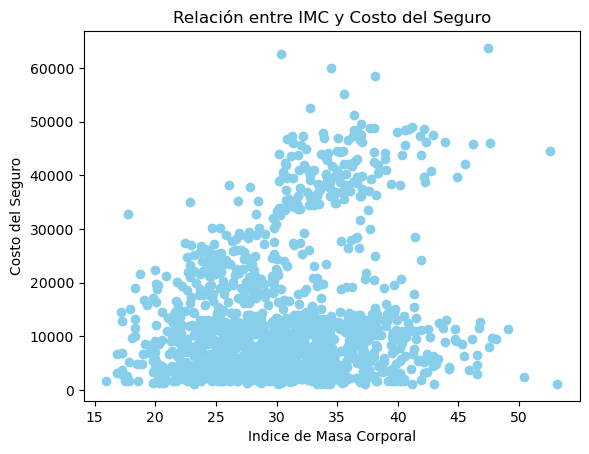

In [66]:
#Relación entre el índice de masa corporal (BMI) y los costos del seguro médico

plt.scatter(df['bmi'],df['charges'],color = 'skyblue')
plt.xlabel('Indice de Masa Corporal')
plt.ylabel('Costo del Seguro')
plt.title('Relación entre IMC y Costo del Seguro')
plt.show()

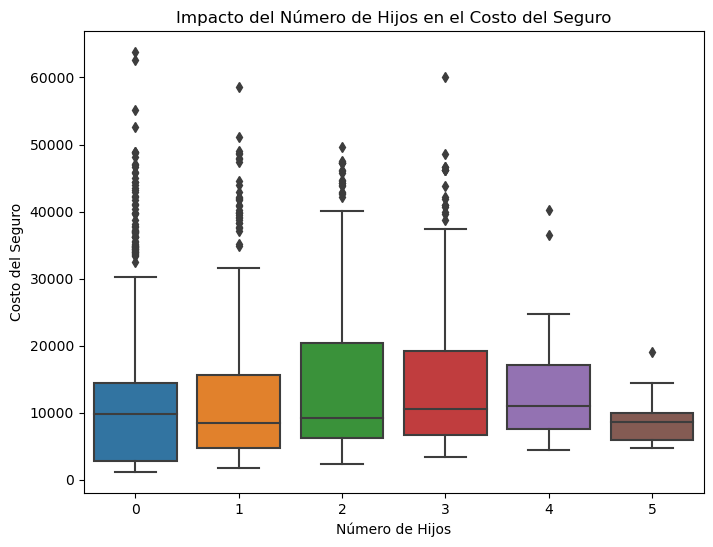

In [67]:
#Impacto del número de hijos en el costo del seguro médico
plt.figure(figsize = (8,6))
sns.boxplot(x = 'children',y = 'charges',data = df)
plt.title('Impacto del Número de Hijos en el Costo del Seguro')
plt.xlabel('Número de Hijos')
plt.ylabel('Costo del Seguro')
plt.show()

In [68]:
#Edad promedio de las personas que fuman y no fuman

edad_fumadores_promedio = df[df['smoker']=='yes']['age'].mean()
edad_no_fumadores_promedio = df[df['smoker']=='no']['age'].mean()
print("Edad promedio de fumadores:",edad_fumadores_promedio)
print("Edad promedio de no fumadores:",edad_no_fumadores_promedio)

Edad promedio de fumadores: 38.51459854014598
Edad promedio de no fumadores: 39.404515522107246


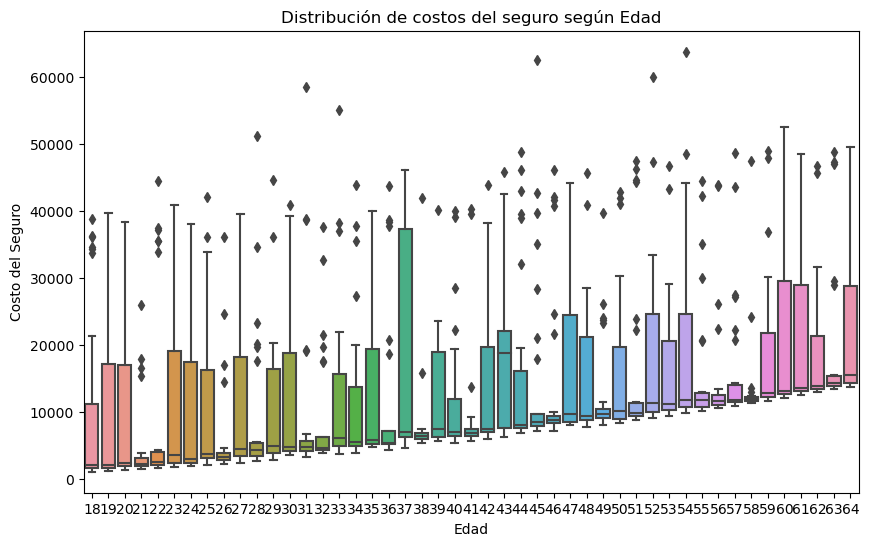

In [70]:
#Distribución de los costos del seguro médico entre los diferentes grupos de edad

plt.figure(figsize = (10,6))
sns.boxplot(x='age',y='charges',data = df)
plt.title('Distribución de costos del seguro según Edad')
plt.xlabel('Edad')
plt.ylabel('Costo del Seguro')
plt.show()

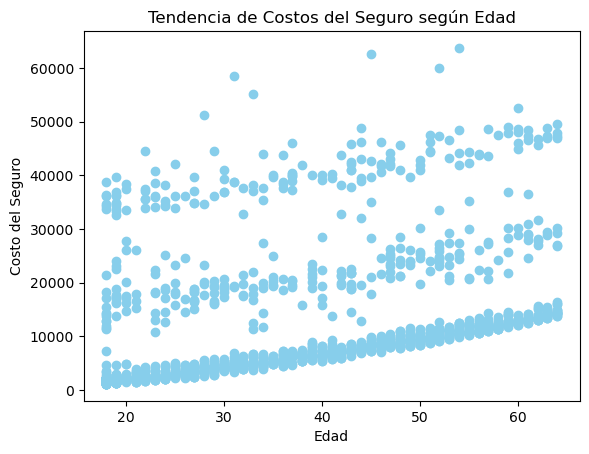

In [71]:
#Tendencia en los costos del seguro médico a medida que aumenta la edad

plt.scatter(df['age'],df['charges'],color = 'skyblue')
plt.title('Tendencia de Costos del Seguro según Edad')
plt.xlabel('Edad')
plt.ylabel('Costo del Seguro')
plt.show()

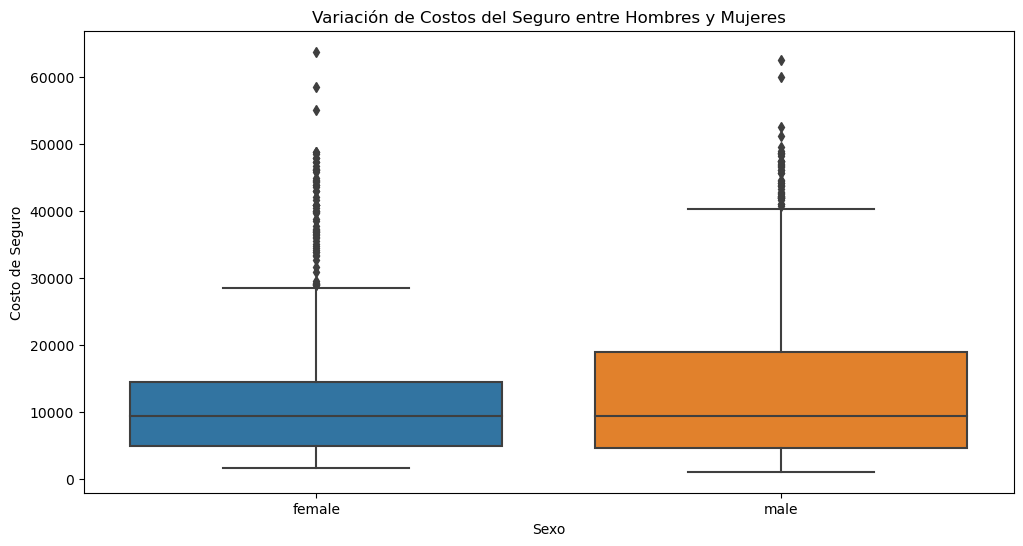

In [76]:
#Variación de los costos del seguro médico entre hombres y mujeres
plt.figure(figsize = (12,6))
sns.boxplot(x = 'sex',y='charges',data = df)
plt.title('Variación de Costos del Seguro entre Hombres y Mujeres')
plt.xlabel('Sexo')
plt.ylabel('Costo de Seguro')
plt.show()